In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Multiclass Image Classification

## Become one with data

In [20]:
import os
os.getcwd()
os.listdir('data/10_food_classes_all_data/test')
for dirpath, dirnames, filenames in os.walk('data/10_food_classes_all_data'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 1 images in data/10_food_classes_all_data
There are 10 directories and 0 images in data/10_food_classes_all_data/test
There are 0 directories and 250 images in data/10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in data/10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in data/10_food_classes_all_data/test/steak
There are 0 directories and 250 images in data/10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in data/10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in data/10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in data/10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in data/10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in data/10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in data/10_food_classes_all_data/te

In [21]:
# Setup train and test sets directories

train_dir = 'data/10_food_classes_all_data/train/'
test_dir = 'data/10_food_classes_all_data/test/'

In [1]:
import pathlib
data_dir=pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

NameError: name 'train_dir' is not defined

In [24]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

    print(f'Image shape: {img.shape}')

    return img

Image shape: (341, 512, 3)


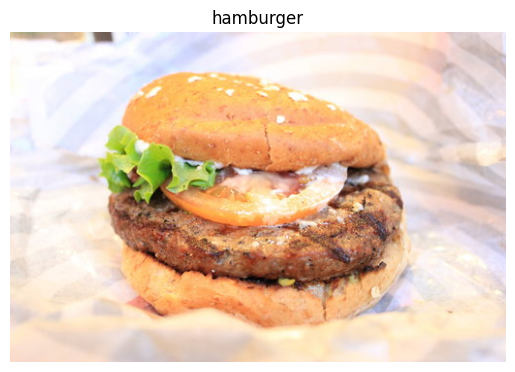

In [29]:
import random
import matplotlib.image as mpimg
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2. Preprocess the data

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical',
    seed=42
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical',
    seed=24
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create the Model

In [31]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_1.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

## Fit the Model

In [32]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


2023-04-05 00:52:54.338876: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


235/235 [==============================] - ETA: 0s - loss: 2.1474 - accuracy: 0.2079

2023-04-05 00:54:02.890989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


235/235 [==============================] - 83s 347ms/step - loss: 2.1474 - accuracy: 0.2079 - val_loss: 1.9915 - val_accuracy: 0.2776
Epoch 2/5
235/235 [==============================] - 79s 334ms/step - loss: 1.8970 - accuracy: 0.3372 - val_loss: 1.9064 - val_accuracy: 0.3384
Epoch 3/5
235/235 [==============================] - 78s 333ms/step - loss: 1.7135 - accuracy: 0.4229 - val_loss: 1.8134 - val_accuracy: 0.3756
Epoch 4/5
235/235 [==============================] - 78s 331ms/step - loss: 1.5193 - accuracy: 0.4951 - val_loss: 1.9151 - val_accuracy: 0.3648
Epoch 5/5
235/235 [==============================] - 78s 333ms/step - loss: 1.3257 - accuracy: 0.5588 - val_loss: 1.9431 - val_accuracy: 0.3632


## 5. Evaluate on the test data

In [33]:
model_1.evaluate(test_data)

2023-04-05 02:04:40.367033: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


79/79 [==============================] - 13s 157ms/step - loss: 1.9431 - accuracy: 0.3632


[1.9430917501449585, 0.36320000886917114]

In [34]:
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

    ax[0].plot(epochs, loss, label='Training loss')
    ax[0].plot(epochs, val_loss, label='Val loss')
    ax[0].set_title('Loss')
    ax[0].set_xlabel('epochs')
    ax[0].legend()

    ax[1].plot(epochs, accuracy, label='Training accuracy')
    ax[1].plot(epochs, val_accuracy, label='Val accuracy')
    ax[1].set_title('Accuracy')
    ax[1].set_xlabel('epochs')
    ax[1].legend()


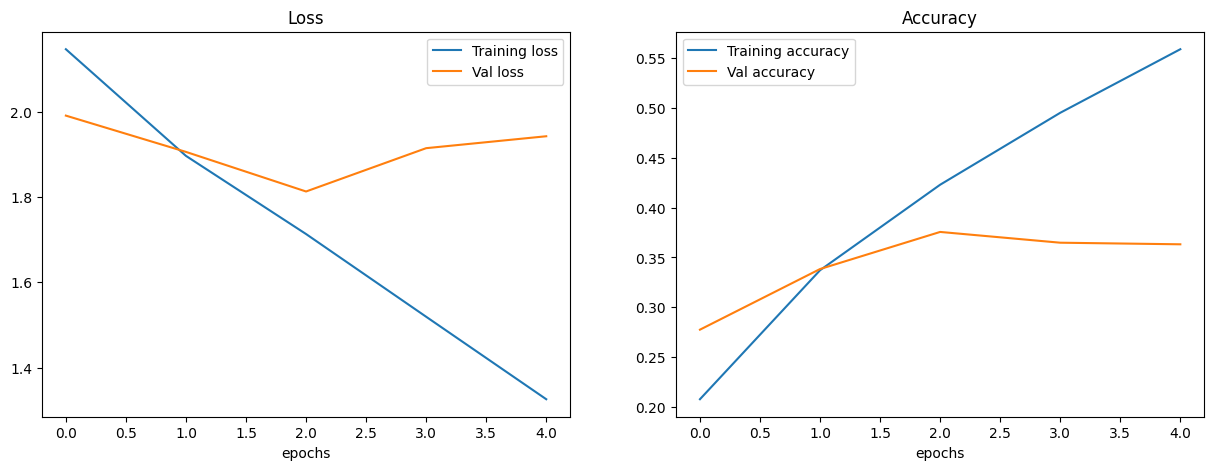

In [35]:
plot_loss_curves(history_1)

The model is learning something, but not generalizing something good, while loss curves going in the opposite directions after some point:

* get more data
* to augment data
* to change the structure of data (to simplify in the case of overfitting)

## 6. Adjust the model parameters to beat the baseline

In [45]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)       0

In [49]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [50]:
history_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5


2023-04-05 09:01:58.688901: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


235/235 [==============================] - ETA: 0s - loss: 2.1610 - accuracy: 0.2327

2023-04-05 09:03:04.181798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


235/235 [==============================] - 78s 326ms/step - loss: 2.1610 - accuracy: 0.2327 - val_loss: 1.9796 - val_accuracy: 0.2908
Epoch 2/5
235/235 [==============================] - 80s 339ms/step - loss: 1.7848 - accuracy: 0.3907 - val_loss: 1.9493 - val_accuracy: 0.3168
Epoch 3/5
235/235 [==============================] - 75s 318ms/step - loss: 1.4246 - accuracy: 0.5316 - val_loss: 2.0211 - val_accuracy: 0.3280
Epoch 4/5
235/235 [==============================] - 73s 310ms/step - loss: 0.9701 - accuracy: 0.6964 - val_loss: 2.2933 - val_accuracy: 0.2936
Epoch 5/5
235/235 [==============================] - 76s 322ms/step - loss: 0.5830 - accuracy: 0.8335 - val_loss: 2.6942 - val_accuracy: 0.2812


In [51]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 29160)             0         
                                                                 
 dense_2 (Dense)             (None, 10)               

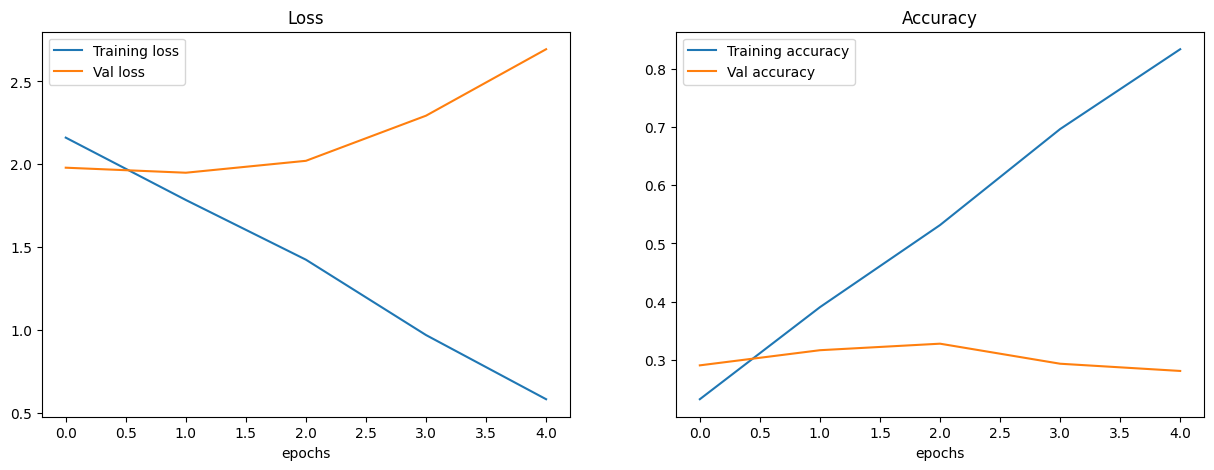

In [52]:
plot_loss_curves(history_2)

## Data Augmentation

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [70]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True
                                             )

train_data_augmented = train_datagen_augmented.flow_from_directory(
                                                                    train_dir,
                                                                    target_size=(224, 224),
                                                                    batch_size=32,
                                                                    class_mode='categorical')


Found 7500 images belonging to 10 classes.


In [71]:
model_3 = tf.keras.models.clone_model(model_2)

model_3.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [76]:
history_3 = model_3.fit(train_data_augmented, 
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


2023-04-05 21:27:17.004815: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


235/235 [==============================] - ETA: 0s - loss: 2.1869 - accuracy: 0.2189

2023-04-05 21:29:36.926157: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


235/235 [==============================] - 153s 645ms/step - loss: 2.1869 - accuracy: 0.2189 - val_loss: 1.9889 - val_accuracy: 0.3000
Epoch 2/5
235/235 [==============================] - 155s 661ms/step - loss: 2.0513 - accuracy: 0.2740 - val_loss: 1.8919 - val_accuracy: 0.3536
Epoch 3/5
235/235 [==============================] - 148s 628ms/step - loss: 1.9756 - accuracy: 0.3169 - val_loss: 1.8302 - val_accuracy: 0.3688
Epoch 4/5
235/235 [==============================] - 149s 634ms/step - loss: 1.9375 - accuracy: 0.3315 - val_loss: 1.7687 - val_accuracy: 0.3988
Epoch 5/5
235/235 [==============================] - 150s 637ms/step - loss: 1.9092 - accuracy: 0.3413 - val_loss: 1.9317 - val_accuracy: 0.3384


In [77]:
model_2.evaluate(test_data)

2023-04-05 21:42:59.945274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


79/79 [==============================] - 13s 167ms/step - loss: 2.6942 - accuracy: 0.2812


[2.694227695465088, 0.28119999170303345]

In [78]:
model_3.evaluate(test_data)

2023-04-05 21:43:15.270034: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


79/79 [==============================] - 11s 143ms/step - loss: 1.9317 - accuracy: 0.3384


[1.9316736459732056, 0.3384000062942505]

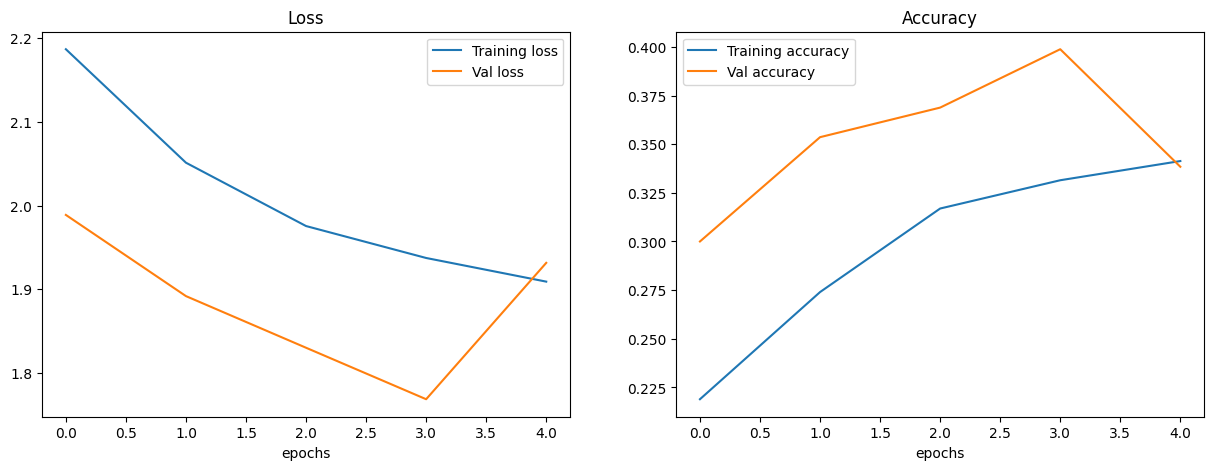

In [79]:
plot_loss_curves(history_3)

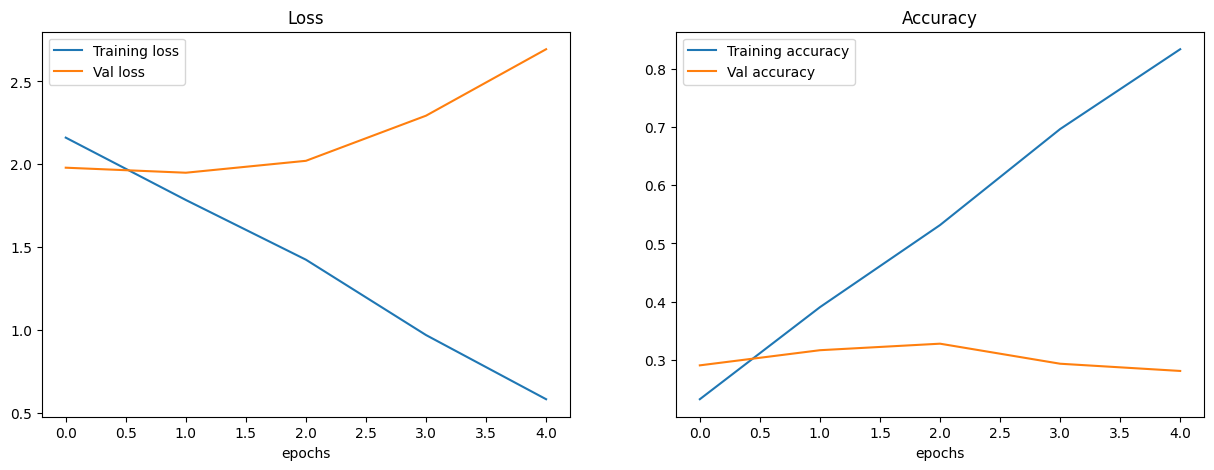

In [80]:

plot_loss_curves(history_2)

## 7. Repeat until satisfied

## 8. Making prediction with our trained model

In [81]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [85]:
def load_prep_image(filename, img_shape=224):
    """
    Read an image from filename, turns it into tensor and reshapes it to (img_shape, img_shape, colour_channels)
    """
    img = tf.io.read_file(filename)
    # Decode the readfile in tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image, get all the values between 0 and 1
    img /= 255.
    return img

In [100]:
def pred_and_plot(model, filename, class_names=class_names):
    img = load_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[np.argmax(pred)]
    plt.imshow(img)
    plt.axis(False)
    plt.title(f'{pred_class} with prob = {pred[0, 0]:.3f}')

1/1 [==============================] - 0s 31ms/step


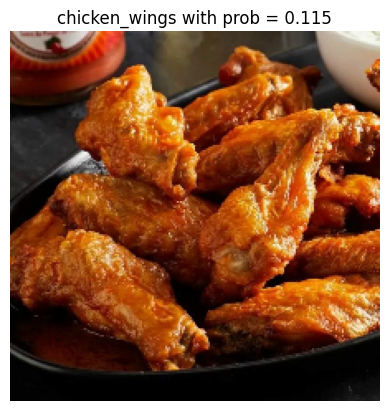

In [102]:
pred_and_plot(model_3, 'data/wings.jpeg', class_names=class_names)

## Saving and loading the model

In [104]:
# save the model
model_3.save('saved_CNN_multi_model')

INFO:tensorflow:Assets written to: saved_CNN_multi_model/assets


INFO:tensorflow:Assets written to: saved_CNN_multi_model/assets


In [106]:
# load the model
loaded_model_3 = tf.keras.models.load_model('saved_CNN_multi_model')

In [107]:
loaded_model_3.evaluate(test_data)

2023-04-05 22:47:38.214353: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


79/79 [==============================] - 13s 159ms/step - loss: 1.9317 - accuracy: 0.3384


[1.9316736459732056, 0.3384000062942505]

In [108]:
model_3.evaluate(test_data)

2023-04-05 22:48:25.763749: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


79/79 [==============================] - 13s 159ms/step - loss: 1.9317 - accuracy: 0.3384


[1.9316734075546265, 0.3384000062942505]